In [2]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [3]:
import pandas as pd
import numpy as np
ratings = pd.read_excel('ratings.xlsx')
ratings.to_csv ('ratings.csv', index = False)

In [4]:
ratings

,movieId,1,2,3,4,5,6,7,8,9,...,992,993,994,995,996,997,998,999,1000,1001
0,1,0.0,0,4,0,0,5,0,4,0,...,0.0,0,0.0,0.0,0,0.0,0,0,0.0,3.5
1,2,3.5,0,0,0,3,0,0,0,0,...,0.0,0,0.0,0.5,0,0.0,0,0,0.0,0.0
2,3,0.0,4,0,0,0,3,3,5,0,...,0.0,0,0.0,0.0,0,0.0,0,3,0.0,0.0
3,4,0.0,0,0,0,0,0,0,0,0,...,0.0,0,0.0,0.0,0,0.0,0,0,0.0,0.0
4,5,0.0,0,0,0,0,0,0,0,0,...,0.0,0,0.0,0.0,0,0.0,0,1,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9741,121583,0.0,0,0,0,0,0,0,0,0,...,0.0,0,0.0,0.0,0,0.0,0,0,0.0,0.0
9742,125916,0.0,0,0,0,0,0,0,0,0,...,0.0,0,0.0,0.0,0,0.0,0,0,0.0,0.0
9743,128488,0.0,0,0,0,0,0,0,0,0,...,0.0,0,0.0,0.0,0,0.0,0,0,0.0,0.0
9744,128594,0.0,0,0,0,0,0,0,0,0,...,0.0,0,0.0,0.0,0,0.0,0,0,0.0,0.0


In [5]:
df = ratings.T

In [6]:
df

,0,1,2,3,4,5,6,7,8,9,...,9736,9737,9738,9739,9740,9741,9742,9743,9744,9745
movieId,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,...,120815.0,120821.0,120823.0,121117.0,121135.0,121583.0,125916.0,128488.0,128594.0,128715.0
1,0.0,3.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
998,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
999,0.0,0.0,3.0,0.0,1.0,3.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
dat = df.to_numpy()
dat = dat[1:]

In [ ]:
from scipy.stats import pearsonr
import numpy as np
def pearson_affinity(M):
   return 1 - np.array([[pearsonr(a,b)[0] for a in M] for b in M])


In [9]:
import sklearn
import matplotlib.pyplot as plt
import sklearn.cluster as cluster
from sklearn.cluster import KMeans

In [10]:
K = range(3, 100)
wss = []
for k in K:
    print(k)
    kmeans = KMeans(init = 'k-means++', n_clusters = k, n_init = 10).fit(dat)
    kmeans = kmeans.fit(dat)
    wss_iter = kmeans.inertia_
    wss.append(wss_iter)

3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


In [11]:
mycenters = pd.DataFrame({'Clusters' : K, 'WSS' : wss})
mycenters

,Clusters,WSS
0,3,1.595666e+06
1,4,1.559597e+06
2,5,1.537521e+06
3,6,1.511878e+06
4,7,1.493808e+06
...,...,...
92,95,9.449873e+05
93,96,9.432968e+05
94,97,9.360158e+05
95,98,9.317483e+05


<AxesSubplot:xlabel='Clusters', ylabel='WSS'>

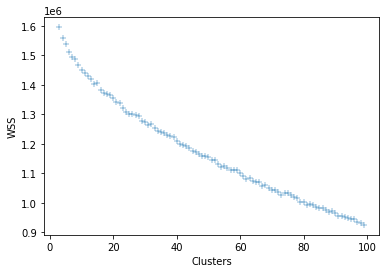

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.scatterplot(x = 'Clusters', y = 'WSS', data = mycenters, marker = '+')

In [2]:
hc = AgglomerativeClustering(n_clusters = 35, affinity = pearson_affinity, linkage = 'average')

NameError: name 'AgglomerativeClustering' is not defined

In [14]:
y_hc = hc.fit_predict(ratings.values)
y_hc

In [ ]:
df

NameError: name 'df' is not defined